In [300]:
library(dplyr)
library(ggplot2)

In [2]:
df <- read.csv("assets/datasets/student_performance_prediction.csv", stringsAsFactors = TRUE)

# 1. Initial Review

In [3]:
head(df)

,Student.ID,Study.Hours.per.Week,Attendance.Rate,Previous.Grades,Participation.in.Extracurricular.Activities,Parent.Education.Level,Passed
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,S00001,12.5,NA,75.0,Yes,Master,Yes
2,S00002,9.3,95.3,60.6,No,High School,No
3,S00003,13.2,NA,64.0,No,Associate,No
4,S00004,17.6,76.8,62.4,Yes,Bachelor,No
5,S00005,8.8,89.3,72.7,No,Master,No
6,S00006,8.8,73.8,69.3,Yes,High School,Yes


In [264]:
str(df)

'data.frame':	40000 obs. of  7 variables:
 $ Student.ID                                 : Factor w/ 40000 levels "S00001","S00002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Study.Hours.per.Week                       : num  12.5 9.3 13.2 17.6 8.8 8.8 17.9 13.8 7.7 12.7 ...
 $ Attendance.Rate                            : num  NA 95.3 NA 76.8 89.3 ...
 $ Previous.Grades                            : num  75 60.6 64 62.4 72.7 69.3 93.6 59.2 91.9 37.8 ...
 $ Participation.in.Extracurricular.Activities: Factor w/ 3 levels "nan","No","Yes": 3 2 2 3 2 3 2 3 2 3 ...
 $ Parent.Education.Level                     : Factor w/ 6 levels "Associate","Bachelor",..: 5 4 1 2 5 4 3 3 2 4 ...
 $ Passed                                     : Factor w/ 3 levels "nan","No","Yes": 3 2 2 2 2 3 3 2 3 1 ...


In [265]:
summary(df[, c("Student.ID", "Study.Hours.per.Week", "Attendance.Rate", "Previous.Grades")])

   Student.ID    Study.Hours.per.Week Attendance.Rate  Previous.Grades 
 S00001 :    1   Min.   :-12.300      Min.   :-14.30   Min.   :  8.30  
 S00002 :    1   1st Qu.:  6.600      1st Qu.: 61.60   1st Qu.: 55.10  
 S00003 :    1   Median : 10.000      Median : 75.30   Median : 65.20  
 S00004 :    1   Mean   :  9.963      Mean   : 75.28   Mean   : 65.44  
 S00005 :    1   3rd Qu.: 13.400      3rd Qu.: 88.80   3rd Qu.: 75.20  
 S00006 :    1   Max.   : 32.400      Max.   :150.20   Max.   :200.00  
 (Other):39994   NA's   :1995         NA's   :1992     NA's   :1994    

In [266]:
summary(df[, c("Participation.in.Extracurricular.Activities", "Parent.Education.Level", "Passed")])

 Participation.in.Extracurricular.Activities Parent.Education.Level Passed     
 nan: 2000                                   Associate  :7604       nan: 2000  
 No :19028                                   Bachelor   :7685       No :18989  
 Yes:18972                                   Doctorate  :7610       Yes:19011  
                                             High School:7675                  
                                             Master     :7426                  
                                             nan        :2000                  

# 2. Removal of Irrelevant Columns

In [267]:
# removing `Student.ID`
df <- df[, -1]

# 3. Change Column Names

In [268]:
colnames(df) <- tolower(colnames(df))

In [269]:
# reviewing the changes
str(df)

'data.frame':	40000 obs. of  6 variables:
 $ study.hours.per.week                       : num  12.5 9.3 13.2 17.6 8.8 8.8 17.9 13.8 7.7 12.7 ...
 $ attendance.rate                            : num  NA 95.3 NA 76.8 89.3 ...
 $ previous.grades                            : num  75 60.6 64 62.4 72.7 69.3 93.6 59.2 91.9 37.8 ...
 $ participation.in.extracurricular.activities: Factor w/ 3 levels "nan","No","Yes": 3 2 2 3 2 3 2 3 2 3 ...
 $ parent.education.level                     : Factor w/ 6 levels "Associate","Bachelor",..: 5 4 1 2 5 4 3 3 2 4 ...
 $ passed                                     : Factor w/ 3 levels "nan","No","Yes": 3 2 2 2 2 3 3 2 3 1 ...


In [270]:
# Cambiar el nombre de una columna específica
names(df)[names(df) == "participation.in.extracurricular.activities"] <- "extracurricular.activities"
names(df)[names(df) == "study.hours.per.week"] <- "study.hrs.perwk"
names(df)[names(df) == "parent.education.level"] <- "parent.edu.level"

In [271]:
# reviewing the changes
str(df)

'data.frame':	40000 obs. of  6 variables:
 $ study.hrs.perwk           : num  12.5 9.3 13.2 17.6 8.8 8.8 17.9 13.8 7.7 12.7 ...
 $ attendance.rate           : num  NA 95.3 NA 76.8 89.3 ...
 $ previous.grades           : num  75 60.6 64 62.4 72.7 69.3 93.6 59.2 91.9 37.8 ...
 $ extracurricular.activities: Factor w/ 3 levels "nan","No","Yes": 3 2 2 3 2 3 2 3 2 3 ...
 $ parent.edu.level          : Factor w/ 6 levels "Associate","Bachelor",..: 5 4 1 2 5 4 3 3 2 4 ...
 $ passed                    : Factor w/ 3 levels "nan","No","Yes": 3 2 2 2 2 3 3 2 3 1 ...


# 4. Handling Duplicates

In [272]:
sum(duplicated(df))

[1] 0

# 5. Handling Null Values

In [273]:
sum(is.na(df))

[1] 5981

In [274]:
# changing 'nan' to NA for easy removal
df$extracurricular.activities[df$extracurricular.activities == "nan"] <- NA
df$parent.edu.level[df$parent.edu.level == "nan"] <- NA
df$passed[df$passed == "nan"] <- NA

In [275]:
sum(is.na(df))

[1] 11981

In [276]:
df <- na.omit(df)
sum(is.na(df))

[1] 0

In [277]:
# there are still 'nan' values as a factor
str(df)

'data.frame':	29446 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 7.7 7.7 1.4 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 91.9 72.3 41.2 49.2 ...
 $ extracurricular.activities: Factor w/ 3 levels "nan","No","Yes": 2 3 2 3 2 3 2 2 3 2 ...
 $ parent.edu.level          : Factor w/ 6 levels "Associate","Bachelor",..: 4 2 5 4 3 3 2 5 5 1 ...
 $ passed                    : Factor w/ 3 levels "nan","No","Yes": 2 2 2 3 3 2 3 2 2 3 ...
 - attr(*, "na.action")= 'omit' Named int [1:10554] 1 3 10 13 14 26 27 41 44 49 ...
  ..- attr(*, "names")= chr [1:10554] "1" "3" "10" "13" ...


In [278]:
# removing 'nan' as a factor
df$extracurricular.activities <- droplevels(df$extracurricular.activities)
df$parent.edu.level <- droplevels(df$parent.edu.level)
df$passed <- droplevels(df$passed)

In [279]:
# reviewing the change
str(df)

'data.frame':	29446 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 7.7 7.7 1.4 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 91.9 72.3 41.2 49.2 ...
 $ extracurricular.activities: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ parent.edu.level          : Factor w/ 5 levels "Associate","Bachelor",..: 4 2 5 4 3 3 2 5 5 1 ...
 $ passed                    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 2 1 1 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:10554] 1 3 10 13 14 26 27 41 44 49 ...
  ..- attr(*, "names")= chr [1:10554] "1" "3" "10" "13" ...


# 6. Data Type Conversion

In [280]:
str(df)

'data.frame':	29446 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 7.7 7.7 1.4 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 91.9 72.3 41.2 49.2 ...
 $ extracurricular.activities: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 1 ...
 $ parent.edu.level          : Factor w/ 5 levels "Associate","Bachelor",..: 4 2 5 4 3 3 2 5 5 1 ...
 $ passed                    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 2 1 1 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:10554] 1 3 10 13 14 26 27 41 44 49 ...
  ..- attr(*, "names")= chr [1:10554] "1" "3" "10" "13" ...


# 7. Error and Anomaly Correction

In [281]:
# negative values in `study.hrs.perwk` and `attendance.rate`
# values higher than 100 in `attendance.rate` and `previous.grades`
summary(df[1:3])

 study.hrs.perwk  attendance.rate  previous.grades 
 Min.   :-9.200   Min.   :-14.30   Min.   :  8.30  
 1st Qu.: 6.600   1st Qu.: 61.60   1st Qu.: 54.90  
 Median :10.000   Median : 75.30   Median : 65.20  
 Mean   : 9.965   Mean   : 75.31   Mean   : 65.41  
 3rd Qu.:13.400   3rd Qu.: 88.80   3rd Qu.: 75.20  
 Max.   :32.400   Max.   :150.20   Max.   :200.00  

## I. Negative Values in Study Hours per Week

In [282]:
# filtering negative values
negative.hours <- df %>% filter(study.hrs.perwk < 0)

In [283]:
head(negative.hours)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,-3.1,37.3,43.1,No,Master,Yes
2,-0.1,50.0,65.9,No,Bachelor,No
3,-6.2,98.7,26.2,Yes,High School,Yes
4,-0.3,67.4,49.1,No,Bachelor,No
5,-1.0,85.5,56.8,No,Associate,Yes
6,-1.5,67.2,68.5,No,Bachelor,No


In [284]:
# changing the negative values to positive
df$study.hrs.perwk <- abs(df$study.hrs.perwk)

## II. Negative Attendance Rate

In [285]:
# filtering the negative values
low.attendance <- df %>% filter(attendance.rate < 0)

In [286]:
head(low.attendance)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,3.0,-8.2,78.8,No,Master,Yes
2,7.9,-1.3,67.6,No,Bachelor,Yes
3,10.7,-3.8,80.9,Yes,High School,Yes
4,7.3,-14.3,61.3,Yes,Doctorate,No


In [287]:
# changing the negative values to positive
df$attendance.rate <- abs(df$attendance.rate)

## III. Attendance Rate Higher than 100

In [288]:
# filtering values higher than 100
high.attendance <- df %>% filter(attendance.rate > 100)

In [296]:
head(high.attendance)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,7.7,100.1,91.9,No,Bachelor,Yes
2,7.7,115.5,41.2,Yes,Master,No
3,17.3,110.3,68.6,No,Bachelor,Yes
4,7.0,111.0,44.3,No,Doctorate,Yes
5,9.4,125.8,59.9,Yes,Associate,No
6,1.2,118.9,70.5,No,Master,Yes


In [290]:
# removing values higher than 100
df <- df[df$attendance.rate <= 100, ]

## IV. Grades Higher than 100

In [291]:
# filtering values higher than 100
high.grades <- df %>% filter(previous.grades > 100)

In [292]:
head(high.grades)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,11.3,67.3,200,Yes,Master,Yes
2,13.6,59.4,102,Yes,High School,No
3,11.2,62.7,200,Yes,Associate,Yes
4,10.4,76.2,200,No,Master,Yes
5,6.1,71.5,104,No,High School,Yes
6,5.1,27.4,200,Yes,High School,No


In [293]:
# removing values higher than 100
df <- df[df$previous.grades <= 100, ]

## V. Check if the Changes have been Applied

In [294]:
# checking if the values are right
summary(df[1:3])

 study.hrs.perwk attendance.rate  previous.grades 
 Min.   : 0.00   Min.   :  0.50   Min.   :  8.30  
 1st Qu.: 6.60   1st Qu.: 59.80   1st Qu.: 54.80  
 Median :10.00   Median : 72.50   Median : 65.00  
 Mean   :10.04   Mean   : 70.98   Mean   : 64.67  
 3rd Qu.:13.40   3rd Qu.: 83.90   3rd Qu.: 74.70  
 Max.   :32.40   Max.   :100.00   Max.   :100.00  

# 8. Outlier data handling

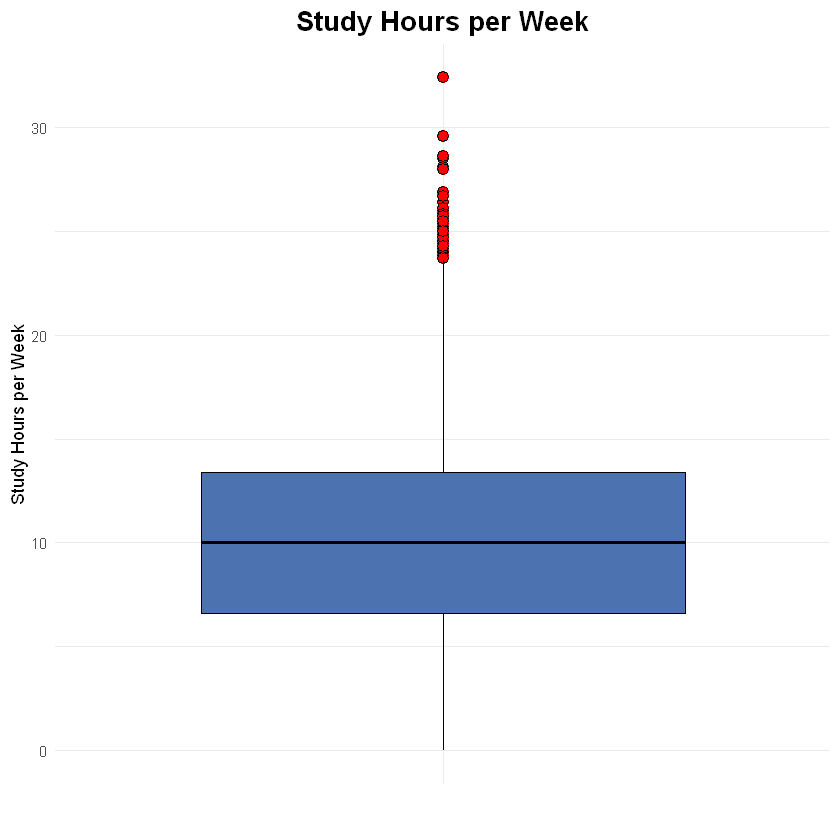

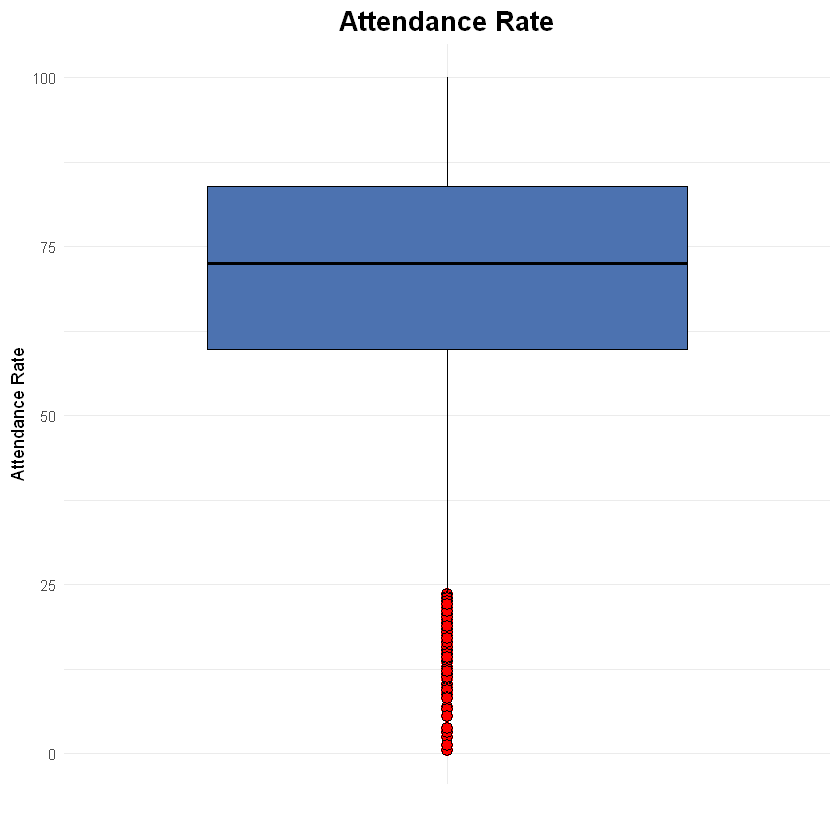

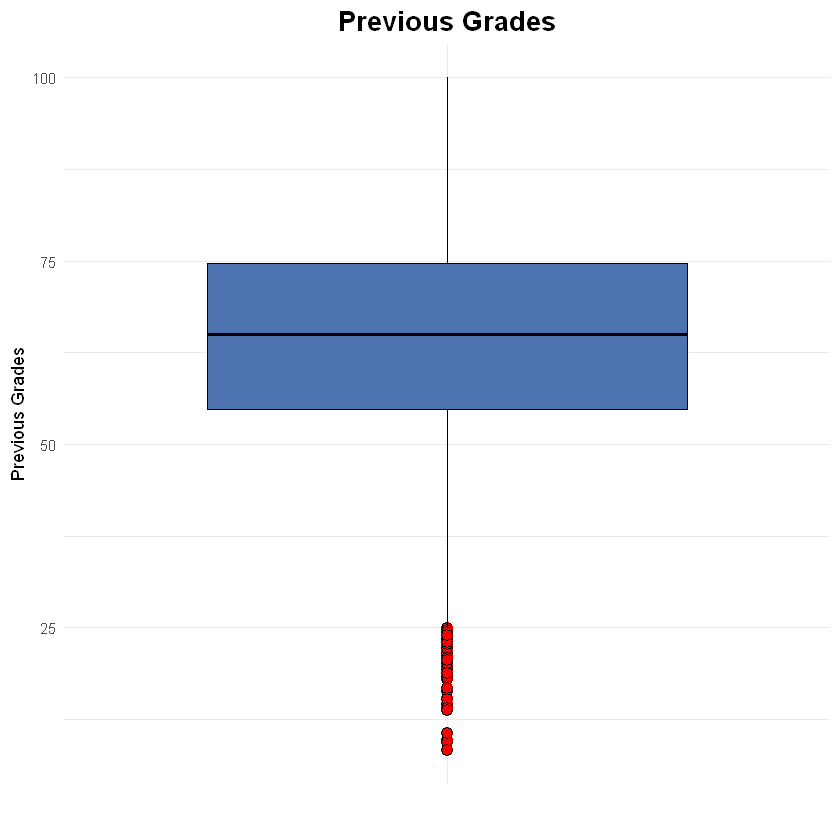

In [303]:
ggplot(df, aes(x = "", y = study.hrs.perwk)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Study Hours per Week",
       x = "",
       y = "Study Hours per Week") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(df, aes(x = "", y = attendance.rate)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Attendance Rate",
       x = "",
       y = "Attendance Rate") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(df, aes(x = "", y = previous.grades)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Previous Grades",
       x = "",
       y = "Previous Grades") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

In [310]:
# filtering the outliers
outliers_study.hrs.perwk <- boxplot(df$study.hrs.perwk, plot=FALSE)$out
outliers_attendance.rate <- boxplot(df$attendance.rate, plot=FALSE)$out
outliers_previous.grades <- boxplot(df$previous.grades, plot=FALSE)$out

In [311]:
exclude_study_h <- !df$study.hrs.perwk %in% outliers_study.hrs.perwk
exclude_attendance <- !df$attendance.rate %in% outliers_attendance.rate
exclude_previous_grades <- !df$previous.grades %in% outliers_previous.grades

In [312]:
# removing the outliers
data_without_outliers <- df[exclude_study_h & exclude_attendance & exclude_previous_grades, ]

In [322]:
# checking outliers
boxplot(data_without_outliers$study.hrs.perwk, plot=FALSE)$out
boxplot(data_without_outliers$attendance.rate, plot=FALSE)$out
boxplot(data_without_outliers$previous.grades, plot=FALSE)$out

[1] 23.6 23.6 23.6 23.6 23.6

[1] 24.0 24.0 23.9 23.7 24.0 24.1 24.2 24.0 23.8 24.1 24.2 23.8 23.7 23.7 23.8
[16] 23.8 24.0

numeric(0)

# 9. Data Validation

## I. Review General Data Integrity

In [338]:
head(data_without_outliers)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
2,9.3,95.3,60.6,No,High School,No
4,17.6,76.8,62.4,Yes,Bachelor,No
5,8.8,89.3,72.7,No,Master,No
6,8.8,73.8,69.3,Yes,High School,Yes
7,17.9,38.6,93.6,No,Doctorate,Yes
8,13.8,95.8,59.2,Yes,Doctorate,No


## II. Review Data Structure

In [323]:
str(data_without_outliers)

'data.frame':	25574 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 1.4 7.2 4.9 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 95.8 54.1 66.5 54.4 71.1 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 72.3 49.2 55.9 98 ...
 $ extracurricular.activities: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 2 ...
 $ parent.edu.level          : Factor w/ 5 levels "Associate","Bachelor",..: 4 2 5 4 3 3 5 1 4 4 ...
 $ passed                    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:10554] 1 3 10 13 14 26 27 41 44 49 ...
  ..- attr(*, "names")= chr [1:10554] "1" "3" "10" "13" ...


## III. Check Descriptive Statistics

In [326]:
summary(data_without_outliers[1:3])

 study.hrs.perwk  attendance.rate previous.grades 
 Min.   : 0.000   Min.   : 23.7   Min.   : 25.10  
 1st Qu.: 6.500   1st Qu.: 60.1   1st Qu.: 54.90  
 Median : 9.900   Median : 72.6   Median : 65.10  
 Mean   : 9.994   Mean   : 71.3   Mean   : 64.82  
 3rd Qu.:13.300   3rd Qu.: 84.0   3rd Qu.: 74.80  
 Max.   :23.600   Max.   :100.0   Max.   :100.00  

In [327]:
summary(data_without_outliers[4:6])

 extracurricular.activities    parent.edu.level passed     
 No :12797                  Associate  :5168    No :12896  
 Yes:12777                  Bachelor   :5169    Yes:12678  
                            Doctorate  :5131               
                            High School:5119               
                            Master     :4987               

## IV. Check Null and Void Values

In [328]:
sum(is.na(data_without_outliers))

[1] 0

## V. Verify the Presence of Duplicates

In [329]:
sum(duplicated(data_without_outliers))

[1] 0

## VI. Inspect Outliers

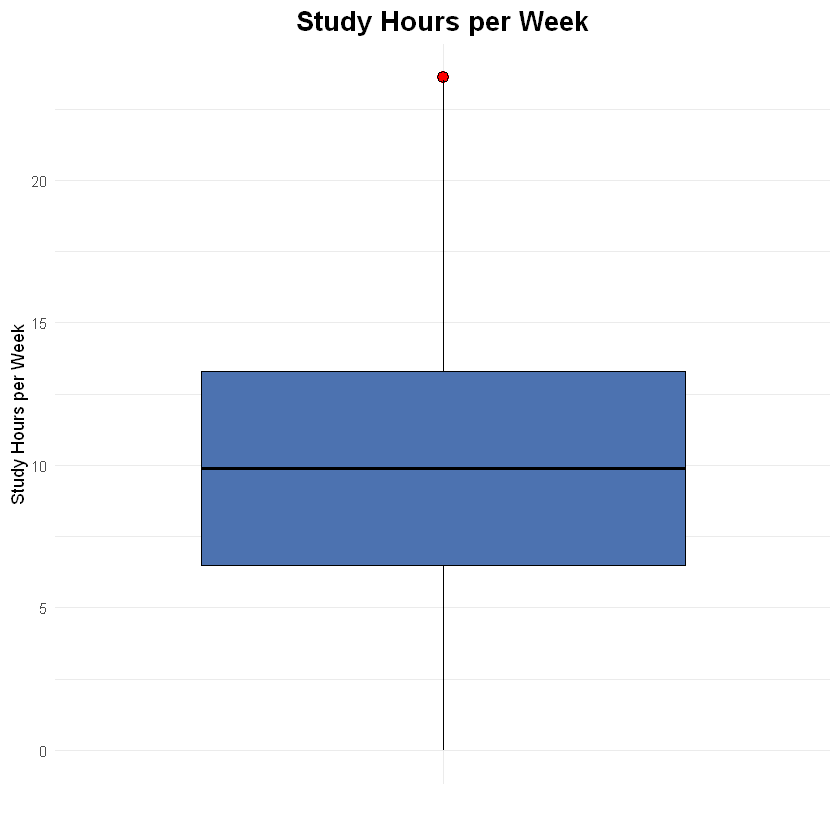

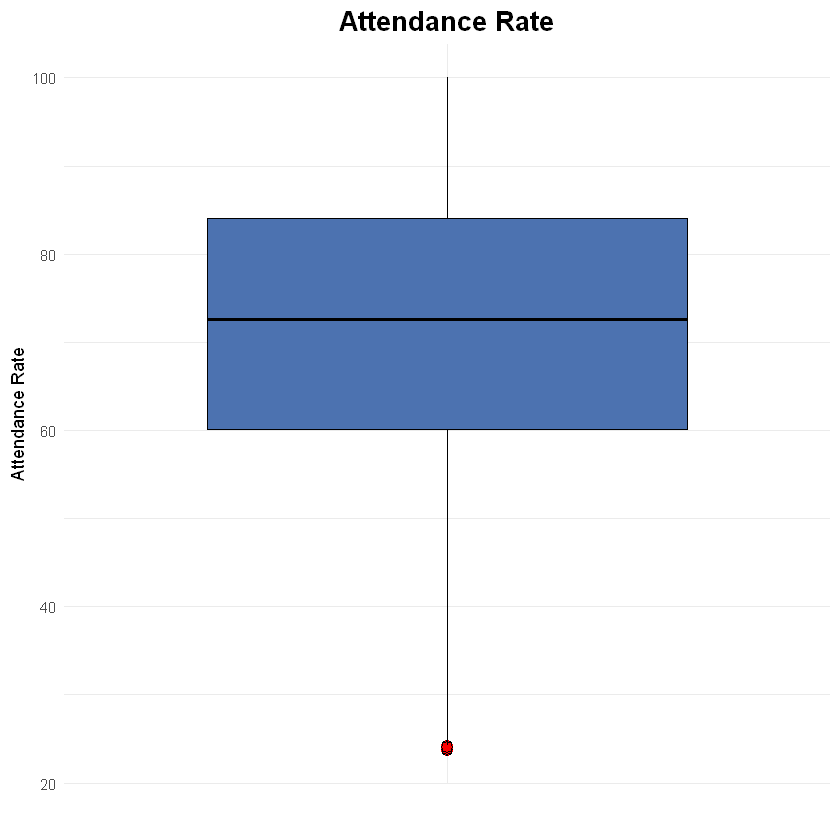

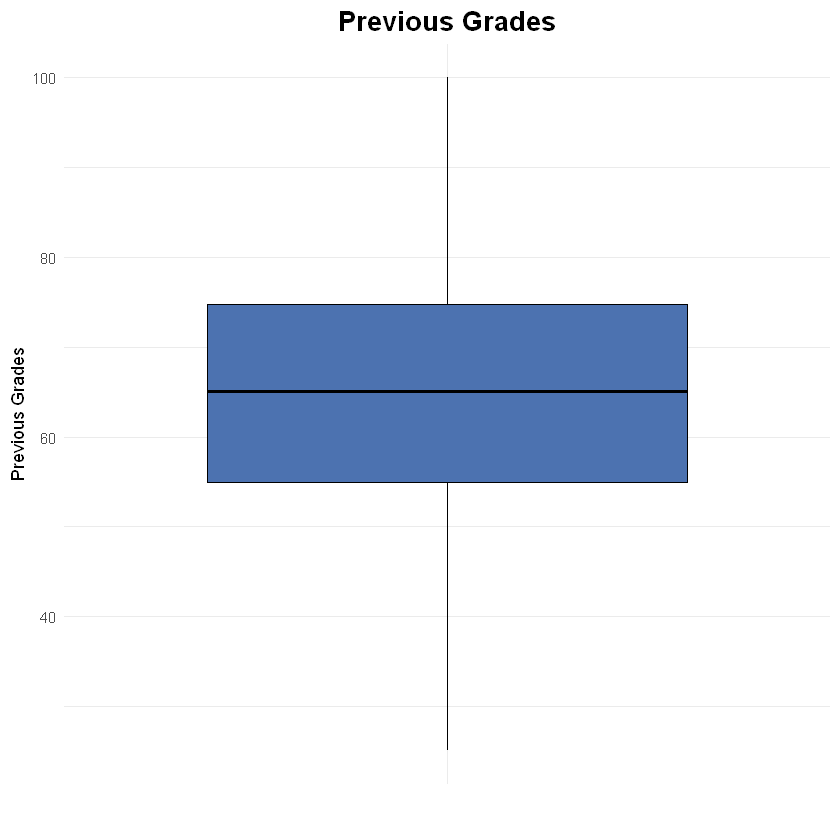

In [330]:
ggplot(data_without_outliers, aes(x = "", y = study.hrs.perwk)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Study Hours per Week",
       x = "",
       y = "Study Hours per Week") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(data_without_outliers, aes(x = "", y = attendance.rate)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Attendance Rate",
       x = "",
       y = "Attendance Rate") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(data_without_outliers, aes(x = "", y = previous.grades)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Previous Grades",
       x = "",
       y = "Previous Grades") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

# 10. Save the Cleaned Data in a Dataset

In [335]:
write.csv(data_without_outliers, "assets/datasets/student_data_cleaned.csv", row.names = FALSE)